# Implementing K-Means from scratch

> __What is K-means Clustering?__

  K Means Clustering is one of most often used Machine Learning techniques in data mining for cluster analysis. The goal of K-means clustering is to divide n observations into k clusters, with each observation belonging to the cluster with the closest mean, which serves as the cluster's pattern.

  The K Means algorithm is an unsupervised learning technique, which means it does not require any training data and instead computes on the real dataset. This should be obvious given that the goal of K Means is to group comparable data points into clusters rather than to make predictions.

> __How K-means work?__

The K Means algorithm is iterative, meaning it calculates the cluster centroids over and over again, refining the values until they don't change much.

The k-means algorithm is used to build clusters from a dataset of ‘n' points and an integer parameter ‘k' that specifies how many clusters to create (supplied by the programmer). The result is a set of ‘k' cluster centroids and a dataset labelling that assigns each data point to a distinct cluster.

The Math:

![kmeansmath](./Assets/kmeansmath.png)

In [5]:
import pandas as pd
import numpy as np

> __Dataset Used__ 

I used the IPL statistics dataset, which is gathered from various sources. The cricket players will be grouped together based on their batting and bowling performances. I'm utilising a normalised dataset, thus I'm not going to normalise it in my code.

In [6]:
data = pd.read_csv('ipl.csv')
data

,one,two
0,0.227680,0.858204
1,0.979188,0.077151
2,0.504577,0.553114
3,0.058132,0.528098
4,0.775343,0.217922
...,...,...
82,0.871180,0.113485
83,0.506821,0.552549
84,0.071231,0.610045
85,0.686203,0.231877


>__Implementation of k-means:__

1. __Handle data__: Cleaning the file, normalising the parameters, and assigning numeric values to non-numeric properties are all examples of how to handle data. Data from the file is read and separated for cross validation.
2. __Locate the Initial Centroids__: Randomly select k centroids.
3. Finding the distance between each of the datapoints and each of the centroids (distance calculation). This statistic is used to determine which cluster the points are part of.
4. __The centroids must be recalculated__: Find the new centroid values.
5. __Put an end to the iteration__: When the difference between the old and new centroids is minimal, the algorithm should be stopped.

In [7]:
class K_Means:
	def __init__(self, k =3, tolerance = 0.0001, max_iterations = 500):
		self.k = k
		self.tolerance = tolerance
		self.max_iterations = max_iterations

	def fit(self, data):

		self.centroids = {}

		#initialize the centroids
		for i in range(self.k):
			self.centroids[i] = data[i]

		#begin iterations
		for i in range(self.max_iterations):
			self.classes = {}
			for i in range(self.k):
				self.classes[i] = []

			#find the distance between the point and cluster; choose the nearest centroid
			for features in data:
				distances = [np.linalg.norm(features - self.centroids[centroid]) for centroid in self.centroids]
				classification = distances.index(min(distances))
				self.classes[classification].append(features)

			previous = dict(self.centroids)

			#average the cluster datapoints to re-calculate the centroids
			for classification in self.classes:
				self.centroids[classification] = np.average(self.classes[classification], axis = 0)

			isOptimal = True

			for centroid in self.centroids:

				original_centroid = previous[centroid]
				curr = self.centroids[centroid]

				if np.sum((curr - original_centroid)/original_centroid * 100.0) > self.tolerance:
					isOptimal = False

			# if the centroids don't change their positions much(more than our tolerance) break out of the main loop if the results are optimal, 
			if isOptimal:
				break

	def pred(self, data):
		distances = [np.linalg.norm(data - self.centroids[centroid]) for centroid in self.centroids]
		classification = distances.index(min(distances))
		return classification


Let's visualise the datasets now that we've finished clustering to see where these clusters are located. To show the dataset, I'll use the python matplotlib tool, then colour the different clusters for visual identification.

In [8]:
#Lets import matplotlib for visualization

import matplotlib.pyplot as plt
def main():
	
	df = pd.read_csv(r"ipl.csv")
	df = df[['one', 'two']]
	dataset = df.astype(float).values.tolist()

	X = df.values #returns a numpy array
	
	km = K_Means(3)
	km.fit(X)

	# Plotting starts here
	colors = 10*["r", "g", "c", "b", "k"]

	for centroid in km.centroids:
		plt.scatter(km.centroids[centroid][0], km.centroids[centroid][1], s = 130, marker = "x")

	for classification in km.classes:
		color = colors[classification]
		for features in km.classes[classification]:
			plt.scatter(features[0], features[1], color = color,s = 30)
	
	plt.show()

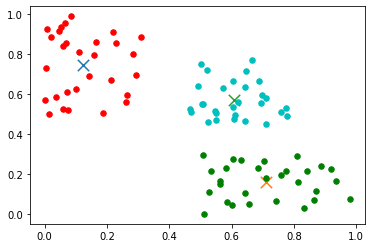

In [9]:
if __name__ == "__main__":
	main()

Here is our scatter plot, which has been clustered using the K Means clustering technique. `Batsmen` (Red), `Bowlers` (Green), and `Allrounders` (Blue) are the three clusters. And the cross mark being the centroids.